# Ins

In [1]:
!pip install medmnist
!pip install albumentations
!pip install torchmetrics
!pip install transformers datasets evaluate accelerate pillow torchvision scikit-learn
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from torchvision import models
# from torchmetrics.classification import BinaryF1Score
from medmnist import PneumoniaMNIST
print("Imported PneumoniaMNIST")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=5f62a80f8f57ee1652dacadf84ae460ded84e65586f718d28c9622f42902b84e
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.3 MB/s eta 0:00:00
Imported PneumoniaMNIST


In [2]:
!rm -rf /kaggle/working/*

# MOCECT

## prep

In [3]:
# import albumentations as A
# from albumentations.pytorch import ToTensorV2

from torchvision.transforms import v2
import torchvision.transforms.v2.functional as v2f
from torchvision.transforms import InterpolationMode

imgnet_mean = [0.485, 0.456, 0.406]
imgnet_std = [0.229, 0.224, 0.225]

train_transform = v2.Compose([
    # v2.RandomResizedCrop(224),
    v2.CenterCrop(224),
    v2.RandomHorizontalFlip(p = 0.5),
    v2.RandomVerticalFlip(p = 0.5),
#     v2.RandomRotation(degrees = 90),
    # v2.ToDtype(torch.float32, scale=True),
#     v2.RandomAffine(degrees = (0, 90), scale = (0.8, 0.9), shear = (-15, 15)),
    v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale = True)]),
#     v2.GaussianNoise(mean = 0, sigma = 1e-7),
    v2.Normalize(imgnet_mean, imgnet_std)
])

empty_transform = v2.Compose([
    v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale = True)]),
    # v2.Grayscale(num_output_channels = 3),
    # v2.Normalize(imgnet_mean, imgnet_std)
])

val_test_transform = v2.Compose([
    # v2.Resize(256),
    v2.CenterCrop(224),
    # v2.ToDtype(torch.float32, scale=True),
    v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale = True)]),
    v2.Normalize(imgnet_mean, imgnet_std)
])

d_trans = v2.Compose([
    v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale = True)]),
])

train_batch_size = 32
vt_batch_size = 32
num_workers = os.cpu_count()

# Datasets:
train_dataset = PneumoniaMNIST(
    split = "train",
    download = True,
    transform = train_transform,
    size = 224
)

val_dataset = PneumoniaMNIST(
    split = "val",
    download = True,
    transform = val_test_transform,
    size = 224
)

test_dataset = PneumoniaMNIST(
    split = "test",
    download = True,
    transform = val_test_transform,
    size = 224
)

dummy_set = PneumoniaMNIST(
    split = "train",
    download = True,
    size = 224,
    transform = d_trans
)

# Loaders:
train_loader = DataLoader(
    train_dataset,
    batch_size = train_batch_size,
    shuffle = True,
    num_workers = num_workers
)

val_loader = DataLoader(
    val_dataset,
    batch_size = vt_batch_size,
    shuffle = False,
    num_workers = num_workers
)

test_loader = DataLoader(
    test_dataset,
    batch_size = vt_batch_size,
    shuffle = False,
    num_workers = num_workers
)

print("Done prepping datasets")

100%|██████████| 214384716/214384716 [00:17<00:00, 12202159.72it/s]


Using downloaded and verified file: /root/.medmnist/pneumoniamnist_224.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist_224.npz
Using downloaded and verified file: /root/.medmnist/pneumoniamnist_224.npz
Done prepping datasets


## model + train


[1.93904448 0.67372639]

198218837 198218837 


Epoch 1/50 
------------------------------------------------------------


Training Epoch 1/50: 100%|██████████| 148/148 [00:46<00:00,  3.16batch/s, loss=0.18266, acc=0.72664, lr=[0.001]]


Train loss: 0.52702, acc: 0.72664, npv: 0.47982, ppv: 0.88065, sen: 0.73068, spe: 0.71499, f1: 0.79869


Validation Epoch 1/50: 100%|██████████| 17/17 [00:03<00:00,  5.00batch/s, loss=0.14417, acc=0.88931]


Val loss: 0.23588, acc: 0.88931, npv: 0.71508, ppv: 0.97971, sen: 0.86889, spe: 0.94815, f1: 0.92098
New best epoch 1

Epoch 2/50 
------------------------------------------------------------


Training Epoch 2/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.09874, acc=0.87043, lr=[0.001]]


Train loss: 0.28826, acc: 0.87043, npv: 0.69359, ppv: 0.95807, sen: 0.86319, spe: 0.89127, f1: 0.90816


Validation Epoch 2/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.12042, acc=0.91221]


Val loss: 0.20680, acc: 0.91221, npv: 0.77987, ppv: 0.96986, sen: 0.91003, spe: 0.91852, f1: 0.93899
New best epoch 2

Epoch 3/50 
------------------------------------------------------------


Training Epoch 3/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.39772, acc=0.88828, lr=[0.001]]


Train loss: 0.27169, acc: 0.88828, npv: 0.72661, ppv: 0.96520, sen: 0.88122, spe: 0.90857, f1: 0.92130


Validation Epoch 3/50: 100%|██████████| 17/17 [00:03<00:00,  5.05batch/s, loss=0.12446, acc=0.90076]


Val loss: 0.20420, acc: 0.90076, npv: 0.73184, ppv: 0.98841, sen: 0.87661, spe: 0.97037, f1: 0.92916
New best epoch 3

Epoch 4/50 
------------------------------------------------------------


Training Epoch 4/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.04322, acc=0.90357, lr=[0.001]]


Train loss: 0.23236, acc: 0.90357, npv: 0.75886, ppv: 0.96914, sen: 0.89868, spe: 0.91763, f1: 0.93258


Validation Epoch 4/50: 100%|██████████| 17/17 [00:03<00:00,  5.04batch/s, loss=0.11345, acc=0.91031]


Val loss: 0.18962, acc: 0.91031, npv: 0.76190, ppv: 0.98034, sen: 0.89717, spe: 0.94815, f1: 0.93691
New best epoch 4

Epoch 5/50 
------------------------------------------------------------


Training Epoch 5/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.23498, acc=0.91143, lr=[0.001]]


Train loss: 0.22237, acc: 0.91143, npv: 0.77693, ppv: 0.97063, sen: 0.90813, spe: 0.92092, f1: 0.93834


Validation Epoch 5/50: 100%|██████████| 17/17 [00:03<00:00,  5.06batch/s, loss=0.10951, acc=0.92939]


Val loss: 0.15699, acc: 0.92939, npv: 0.80625, ppv: 0.98352, sen: 0.92031, spe: 0.95556, f1: 0.95086
New best epoch 5

Epoch 6/50 
------------------------------------------------------------


Training Epoch 6/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.96483, acc=0.92120, lr=[0.001]]


Train loss: 0.19406, acc: 0.92120, npv: 0.79830, ppv: 0.97390, sen: 0.91843, spe: 0.92916, f1: 0.94535


Validation Epoch 6/50: 100%|██████████| 17/17 [00:03<00:00,  5.01batch/s, loss=0.12339, acc=0.92939]


Val loss: 0.15181, acc: 0.92939, npv: 0.79518, ppv: 0.99162, sen: 0.91260, spe: 0.97778, f1: 0.95047
New best epoch 6

Epoch 7/50 
------------------------------------------------------------


Training Epoch 7/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.20169, acc=0.91801, lr=[0.001]]


Train loss: 0.20606, acc: 0.91801, npv: 0.78750, ppv: 0.97552, sen: 0.91242, spe: 0.93410, f1: 0.94292


Validation Epoch 7/50: 100%|██████████| 17/17 [00:03<00:00,  5.07batch/s, loss=0.19069, acc=0.91985]


Val loss: 0.17747, acc: 0.91985, npv: 0.77193, ppv: 0.99150, sen: 0.89974, spe: 0.97778, f1: 0.94340

Epoch 8/50 
------------------------------------------------------------


Training Epoch 8/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.71771, acc=0.92651, lr=[0.001]]


Train loss: 0.19104, acc: 0.92651, npv: 0.81044, ppv: 0.97553, sen: 0.92416, spe: 0.93328, f1: 0.94915


Validation Epoch 8/50: 100%|██████████| 17/17 [00:03<00:00,  5.04batch/s, loss=0.14207, acc=0.92748]


Val loss: 0.15220, acc: 0.92748, npv: 0.80503, ppv: 0.98082, sen: 0.92031, spe: 0.94815, f1: 0.94960

Epoch 9/50 
------------------------------------------------------------


Training Epoch 9/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.02672, acc=0.93267, lr=[0.001]]


Train loss: 0.17395, acc: 0.93267, npv: 0.82151, ppv: 0.97947, sen: 0.92873, spe: 0.94399, f1: 0.95343


Validation Epoch 9/50: 100%|██████████| 17/17 [00:03<00:00,  5.05batch/s, loss=0.28224, acc=0.91794]


Val loss: 0.16231, acc: 0.91794, npv: 0.76136, ppv: 0.99713, sen: 0.89203, spe: 0.99259, f1: 0.94166

Epoch 10/50 
------------------------------------------------------------


Training Epoch 10/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.01119, acc=0.93203, lr=[0.001]]


Train loss: 0.16576, acc: 0.93203, npv: 0.82020, ppv: 0.97917, sen: 0.92816, spe: 0.94316, f1: 0.95298


Validation Epoch 10/50: 100%|██████████| 17/17 [00:03<00:00,  5.05batch/s, loss=0.20302, acc=0.94084]


Val loss: 0.13203, acc: 0.94084, npv: 0.83333, ppv: 0.98641, sen: 0.93316, spe: 0.96296, f1: 0.95905
New best epoch 10

Epoch 11/50 
------------------------------------------------------------


Training Epoch 11/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.11078, acc=0.93925, lr=[0.001]]


Train loss: 0.15803, acc: 0.93925, npv: 0.83478, ppv: 0.98284, sen: 0.93446, spe: 0.95305, f1: 0.95804


Validation Epoch 11/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.20947, acc=0.94275]


Val loss: 0.11610, acc: 0.94275, npv: 0.83019, ppv: 0.99178, sen: 0.93059, spe: 0.97778, f1: 0.96021
New best epoch 11

Epoch 12/50 
------------------------------------------------------------


Training Epoch 12/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00369, acc=0.93819, lr=[0.001]]


Train loss: 0.14956, acc: 0.93819, npv: 0.83321, ppv: 0.98194, sen: 0.93389, spe: 0.95058, f1: 0.95731


Validation Epoch 12/50: 100%|██████████| 17/17 [00:03<00:00,  5.04batch/s, loss=0.17015, acc=0.96756]


Val loss: 0.10457, acc: 0.96756, npv: 0.92143, ppv: 0.98438, sen: 0.97172, spe: 0.95556, f1: 0.97801
New best epoch 12

Epoch 13/50 
------------------------------------------------------------


Training Epoch 13/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.02098, acc=0.94265, lr=[0.001]]


Train loss: 0.14619, acc: 0.94265, npv: 0.84553, ppv: 0.98235, sen: 0.93961, spe: 0.95140, f1: 0.96050


Validation Epoch 13/50: 100%|██████████| 17/17 [00:03<00:00,  5.07batch/s, loss=0.18722, acc=0.94275]


Val loss: 0.10661, acc: 0.94275, npv: 0.82609, ppv: 0.99449, sen: 0.92802, spe: 0.98519, f1: 0.96011

Epoch 14/50 
------------------------------------------------------------


Training Epoch 14/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.22347, acc=0.94945, lr=[0.001]]


Train loss: 0.13529, acc: 0.94945, npv: 0.86148, ppv: 0.98481, sen: 0.94648, spe: 0.95799, f1: 0.96527


Validation Epoch 14/50: 100%|██████████| 17/17 [00:03<00:00,  5.05batch/s, loss=0.21117, acc=0.94466]


Val loss: 0.11339, acc: 0.94466, npv: 0.83125, ppv: 0.99451, sen: 0.93059, spe: 0.98519, f1: 0.96149

Epoch 15/50 
------------------------------------------------------------


Training Epoch 15/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.02314, acc=0.94562, lr=[0.001]]


Train loss: 0.14103, acc: 0.94562, npv: 0.85272, ppv: 0.98328, sen: 0.94276, spe: 0.95387, f1: 0.96259


Validation Epoch 15/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.26329, acc=0.95420]


Val loss: 0.09773, acc: 0.95420, npv: 0.85350, ppv: 0.99728, sen: 0.94087, spe: 0.99259, f1: 0.96825
New best epoch 15

Epoch 16/50 
------------------------------------------------------------


Training Epoch 16/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.55589, acc=0.95263, lr=[0.001]]


Train loss: 0.12231, acc: 0.95263, npv: 0.86895, ppv: 0.98603, sen: 0.94963, spe: 0.96129, f1: 0.96749


Validation Epoch 16/50: 100%|██████████| 17/17 [00:03<00:00,  4.90batch/s, loss=0.25406, acc=0.96183]


Val loss: 0.08664, acc: 0.96183, npv: 0.89116, ppv: 0.98939, sen: 0.95887, spe: 0.97037, f1: 0.97389
New best epoch 16

Epoch 17/50 
------------------------------------------------------------


Training Epoch 17/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.09362, acc=0.95412, lr=[0.001]]


Train loss: 0.12305, acc: 0.95412, npv: 0.87018, ppv: 0.98780, sen: 0.94991, spe: 0.96623, f1: 0.96849


Validation Epoch 17/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.27091, acc=0.94847]


Val loss: 0.10899, acc: 0.94847, npv: 0.83333, ppv: 1.00000, sen: 0.93059, spe: 1.00000, f1: 0.96405

Epoch 18/50 
------------------------------------------------------------


Training Epoch 18/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.09428, acc=0.94647, lr=[0.001]]


Train loss: 0.13295, acc: 0.94647, npv: 0.85682, ppv: 0.98244, sen: 0.94476, spe: 0.95140, f1: 0.96323


Validation Epoch 18/50: 100%|██████████| 17/17 [00:03<00:00,  5.01batch/s, loss=0.27778, acc=0.93321]


Val loss: 0.15910, acc: 0.93321, npv: 0.79412, ppv: 1.00000, sen: 0.91003, spe: 1.00000, f1: 0.95289

Epoch 19/50 
------------------------------------------------------------


Training Epoch 19/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00705, acc=0.95221, lr=[0.001]]


Train loss: 0.11847, acc: 0.95221, npv: 0.86766, ppv: 0.98602, sen: 0.94906, spe: 0.96129, f1: 0.96719


Validation Epoch 19/50: 100%|██████████| 17/17 [00:03<00:00,  5.02batch/s, loss=0.26318, acc=0.95038]


Val loss: 0.11694, acc: 0.95038, npv: 0.83851, ppv: 1.00000, sen: 0.93316, spe: 1.00000, f1: 0.96543

Epoch 20/50 
------------------------------------------------------------


Training Epoch 20/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.02527, acc=0.94796, lr=[0.001]]


Train loss: 0.12813, acc: 0.94796, npv: 0.85704, ppv: 0.98478, sen: 0.94448, spe: 0.95799, f1: 0.96421


Validation Epoch 20/50: 100%|██████████| 17/17 [00:03<00:00,  5.05batch/s, loss=0.17743, acc=0.95611]


Val loss: 0.08768, acc: 0.95611, npv: 0.86364, ppv: 0.99459, sen: 0.94602, spe: 0.98519, f1: 0.96970

Epoch 21/50 
------------------------------------------------------------


Training Epoch 21/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00969, acc=0.95731, lr=[0.001]]


Train loss: 0.10741, acc: 0.95731, npv: 0.88284, ppv: 0.98641, sen: 0.95564, spe: 0.96211, f1: 0.97078


Validation Epoch 21/50: 100%|██████████| 17/17 [00:03<00:00,  5.02batch/s, loss=0.14083, acc=0.96183]


Val loss: 0.08522, acc: 0.96183, npv: 0.87097, ppv: 1.00000, sen: 0.94859, spe: 1.00000, f1: 0.97361
New best epoch 21

Epoch 22/50 
------------------------------------------------------------


Training Epoch 22/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.05105, acc=0.95964, lr=[0.001]]


Train loss: 0.10469, acc: 0.95964, npv: 0.88266, ppv: 0.99021, sen: 0.95507, spe: 0.97282, f1: 0.97232


Validation Epoch 22/50: 100%|██████████| 17/17 [00:03<00:00,  5.05batch/s, loss=0.21032, acc=0.95992]


Val loss: 0.08996, acc: 0.95992, npv: 0.86538, ppv: 1.00000, sen: 0.94602, spe: 1.00000, f1: 0.97226

Epoch 23/50 
------------------------------------------------------------


Training Epoch 23/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.01775, acc=0.95327, lr=[0.001]]


Train loss: 0.11327, acc: 0.95327, npv: 0.87145, ppv: 0.98576, sen: 0.95077, spe: 0.96046, f1: 0.96795


Validation Epoch 23/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.15765, acc=0.97137]


Val loss: 0.07149, acc: 0.97137, npv: 0.92254, ppv: 0.98953, sen: 0.97172, spe: 0.97037, f1: 0.98054
New best epoch 23

Epoch 24/50 
------------------------------------------------------------


Training Epoch 24/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.00801, acc=0.95794, lr=[0.001]]


Train loss: 0.10503, acc: 0.95794, npv: 0.88485, ppv: 0.98642, sen: 0.95650, spe: 0.96211, f1: 0.97123


Validation Epoch 24/50: 100%|██████████| 17/17 [00:03<00:00,  5.04batch/s, loss=0.17413, acc=0.95420]


Val loss: 0.09080, acc: 0.95420, npv: 0.85350, ppv: 0.99728, sen: 0.94087, spe: 0.99259, f1: 0.96825

Epoch 25/50 
------------------------------------------------------------


Training Epoch 25/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.90021, acc=0.95879, lr=[0.001]]


Train loss: 0.09713, acc: 0.95879, npv: 0.88404, ppv: 0.98817, sen: 0.95592, spe: 0.96705, f1: 0.97178


Validation Epoch 25/50: 100%|██████████| 17/17 [00:03<00:00,  5.06batch/s, loss=0.16440, acc=0.95420]


Val loss: 0.09165, acc: 0.95420, npv: 0.84906, ppv: 1.00000, sen: 0.93830, spe: 1.00000, f1: 0.96817

Epoch 26/50 
------------------------------------------------------------


Training Epoch 26/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.05939, acc=0.95731, lr=[0.001]]


Train loss: 0.11336, acc: 0.95731, npv: 0.88635, ppv: 0.98469, sen: 0.95736, spe: 0.95717, f1: 0.97083


Validation Epoch 26/50: 100%|██████████| 17/17 [00:03<00:00,  5.00batch/s, loss=0.09084, acc=0.97328]


Val loss: 0.06656, acc: 0.97328, npv: 0.91156, ppv: 0.99735, sen: 0.96658, spe: 0.99259, f1: 0.98172
New best epoch 26

Epoch 27/50 
------------------------------------------------------------


Training Epoch 27/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.11626, acc=0.95773, lr=[0.001]]


Train loss: 0.10072, acc: 0.95773, npv: 0.88418, ppv: 0.98642, sen: 0.95621, spe: 0.96211, f1: 0.97108


Validation Epoch 27/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.26115, acc=0.95420]


Val loss: 0.09824, acc: 0.95420, npv: 0.84906, ppv: 1.00000, sen: 0.93830, spe: 1.00000, f1: 0.96817

Epoch 28/50 
------------------------------------------------------------


Training Epoch 28/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00084, acc=0.96262, lr=[0.001]]


Train loss: 0.08819, acc: 0.96262, npv: 0.89438, ppv: 0.98909, sen: 0.96022, spe: 0.96952, f1: 0.97444


Validation Epoch 28/50: 100%|██████████| 17/17 [00:03<00:00,  4.99batch/s, loss=0.02426, acc=0.97901]


Val loss: 0.07097, acc: 0.97901, npv: 0.95588, ppv: 0.98711, sen: 0.98458, spe: 0.96296, f1: 0.98584

Epoch 29/50 
------------------------------------------------------------


Training Epoch 29/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.40057, acc=0.95879, lr=[0.001]]


Train loss: 0.10050, acc: 0.95879, npv: 0.88754, ppv: 0.98644, sen: 0.95764, spe: 0.96211, f1: 0.97183


Validation Epoch 29/50: 100%|██████████| 17/17 [00:03<00:00,  4.99batch/s, loss=0.14908, acc=0.96183]


Val loss: 0.08160, acc: 0.96183, npv: 0.87097, ppv: 1.00000, sen: 0.94859, spe: 1.00000, f1: 0.97361

Epoch 30/50 
------------------------------------------------------------


Training Epoch 30/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00868, acc=0.95922, lr=[0.001]]


Train loss: 0.10186, acc: 0.95922, npv: 0.88479, ppv: 0.98846, sen: 0.95621, spe: 0.96787, f1: 0.97207


Validation Epoch 30/50: 100%|██████████| 17/17 [00:03<00:00,  5.00batch/s, loss=0.31412, acc=0.93321]


Val loss: 0.17347, acc: 0.93321, npv: 0.79412, ppv: 1.00000, sen: 0.91003, spe: 1.00000, f1: 0.95289

Epoch 31/50 
------------------------------------------------------------


Training Epoch 31/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00089, acc=0.96538, lr=[0.001]]


Train loss: 0.08315, acc: 0.96538, npv: 0.90145, ppv: 0.99000, sen: 0.96308, spe: 0.97199, f1: 0.97635


Validation Epoch 31/50: 100%|██████████| 17/17 [00:03<00:00,  5.02batch/s, loss=0.17063, acc=0.95802]


Val loss: 0.07870, acc: 0.95802, npv: 0.85987, ppv: 1.00000, sen: 0.94344, spe: 1.00000, f1: 0.97090

Epoch 32/50 
------------------------------------------------------------


Training Epoch 32/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.06782, acc=0.96028, lr=[0.001]]


Train loss: 0.10201, acc: 0.96028, npv: 0.88580, ppv: 0.98964, sen: 0.95650, spe: 0.97117, f1: 0.97278


Validation Epoch 32/50: 100%|██████████| 17/17 [00:03<00:00,  5.02batch/s, loss=0.09840, acc=0.96947]


Val loss: 0.06076, acc: 0.96947, npv: 0.90476, ppv: 0.99469, sen: 0.96401, spe: 0.98519, f1: 0.97911
New best epoch 32

Epoch 33/50 
------------------------------------------------------------


Training Epoch 33/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.13088, acc=0.96134, lr=[0.001]]


Train loss: 0.09848, acc: 0.96134, npv: 0.89571, ppv: 0.98649, sen: 0.96108, spe: 0.96211, f1: 0.97362


Validation Epoch 33/50: 100%|██████████| 17/17 [00:03<00:00,  5.06batch/s, loss=0.08928, acc=0.96565]


Val loss: 0.07127, acc: 0.96565, npv: 0.88235, ppv: 1.00000, sen: 0.95373, spe: 1.00000, f1: 0.97632

Epoch 34/50 
------------------------------------------------------------


Training Epoch 34/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.06465, acc=0.96835, lr=[0.001]]


Train loss: 0.08560, acc: 0.96835, npv: 0.91440, ppv: 0.98861, sen: 0.96852, spe: 0.96787, f1: 0.97846


Validation Epoch 34/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.04656, acc=0.97137]


Val loss: 0.06618, acc: 0.97137, npv: 0.90541, ppv: 0.99734, sen: 0.96401, spe: 0.99259, f1: 0.98039

Epoch 35/50 
------------------------------------------------------------


Training Epoch 35/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00217, acc=0.96899, lr=[0.001]]


Train loss: 0.07909, acc: 0.96899, npv: 0.91267, ppv: 0.99033, sen: 0.96766, spe: 0.97282, f1: 0.97887


Validation Epoch 35/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.04228, acc=0.97328]


Val loss: 0.05922, acc: 0.97328, npv: 0.91156, ppv: 0.99735, sen: 0.96658, spe: 0.99259, f1: 0.98172
New best epoch 35

Epoch 36/50 
------------------------------------------------------------


Training Epoch 36/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.00840, acc=0.97005, lr=[0.001]]


Train loss: 0.07812, acc: 0.97005, npv: 0.91621, ppv: 0.99035, sen: 0.96909, spe: 0.97282, f1: 0.97960


Validation Epoch 36/50: 100%|██████████| 17/17 [00:03<00:00,  5.00batch/s, loss=0.14224, acc=0.94275]


Val loss: 0.12298, acc: 0.94275, npv: 0.81818, ppv: 1.00000, sen: 0.92288, spe: 1.00000, f1: 0.95989

Epoch 37/50 
------------------------------------------------------------


Training Epoch 37/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.00175, acc=0.96793, lr=[0.001]]


Train loss: 0.08343, acc: 0.96793, npv: 0.91042, ppv: 0.98975, sen: 0.96680, spe: 0.97117, f1: 0.97814


Validation Epoch 37/50: 100%|██████████| 17/17 [00:03<00:00,  5.05batch/s, loss=0.01188, acc=0.96756]


Val loss: 0.06134, acc: 0.96756, npv: 0.89333, ppv: 0.99733, sen: 0.95887, spe: 0.99259, f1: 0.97772

Epoch 38/50 
------------------------------------------------------------


Training Epoch 38/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.00056, acc=0.96623, lr=[0.001]]


Train loss: 0.08145, acc: 0.96623, npv: 0.90797, ppv: 0.98829, sen: 0.96594, spe: 0.96705, f1: 0.97699


Validation Epoch 38/50: 100%|██████████| 17/17 [00:03<00:00,  5.06batch/s, loss=0.02196, acc=0.98092]


Val loss: 0.05508, acc: 0.98092, npv: 0.96992, ppv: 0.98465, sen: 0.98972, spe: 0.95556, f1: 0.98718
New best epoch 38

Epoch 39/50 
------------------------------------------------------------


Training Epoch 39/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00078, acc=0.96559, lr=[0.001]]


Train loss: 0.09033, acc: 0.96559, npv: 0.90462, ppv: 0.98885, sen: 0.96451, spe: 0.96870, f1: 0.97653


Validation Epoch 39/50: 100%|██████████| 17/17 [00:03<00:00,  5.07batch/s, loss=0.02131, acc=0.97710]


Val loss: 0.05342, acc: 0.97710, npv: 0.94891, ppv: 0.98708, sen: 0.98201, spe: 0.96296, f1: 0.98454
New best epoch 39

Epoch 40/50 
------------------------------------------------------------


Training Epoch 40/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.00393, acc=0.97026, lr=[0.001]]


Train loss: 0.07555, acc: 0.97026, npv: 0.91628, ppv: 0.99064, sen: 0.96909, spe: 0.97364, f1: 0.97975


Validation Epoch 40/50: 100%|██████████| 17/17 [00:03<00:00,  5.05batch/s, loss=0.05890, acc=0.96565]


Val loss: 0.07241, acc: 0.96565, npv: 0.88235, ppv: 1.00000, sen: 0.95373, spe: 1.00000, f1: 0.97632

Epoch 41/50 
------------------------------------------------------------


Training Epoch 41/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.00159, acc=0.96920, lr=[0.001]]


Train loss: 0.07579, acc: 0.96920, npv: 0.91274, ppv: 0.99062, sen: 0.96766, spe: 0.97364, f1: 0.97901


Validation Epoch 41/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.02108, acc=0.97710]


Val loss: 0.05690, acc: 0.97710, npv: 0.93617, ppv: 0.99217, sen: 0.97686, spe: 0.97778, f1: 0.98446

Epoch 42/50 
------------------------------------------------------------


Training Epoch 42/50: 100%|██████████| 148/148 [00:46<00:00,  3.20batch/s, loss=0.02194, acc=0.96963, lr=[0.001]]


Train loss: 0.07625, acc: 0.96963, npv: 0.91479, ppv: 0.99034, sen: 0.96852, spe: 0.97282, f1: 0.97931


Validation Epoch 42/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.02778, acc=0.98092]


Val loss: 0.04841, acc: 0.98092, npv: 0.93706, ppv: 0.99738, sen: 0.97686, spe: 0.99259, f1: 0.98701
New best epoch 42

Epoch 43/50 
------------------------------------------------------------


Training Epoch 43/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00966, acc=0.97685, lr=[0.001]]


Train loss: 0.06398, acc: 0.97685, npv: 0.92996, ppv: 0.99445, sen: 0.97424, spe: 0.98435, f1: 0.98424


Validation Epoch 43/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.01447, acc=0.97137]


Val loss: 0.05579, acc: 0.97137, npv: 0.90541, ppv: 0.99734, sen: 0.96401, spe: 0.99259, f1: 0.98039

Epoch 44/50 
------------------------------------------------------------


Training Epoch 44/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00898, acc=0.97111, lr=[0.001]]


Train loss: 0.07010, acc: 0.97111, npv: 0.91848, ppv: 0.99094, sen: 0.96995, spe: 0.97446, f1: 0.98033


Validation Epoch 44/50: 100%|██████████| 17/17 [00:03<00:00,  5.05batch/s, loss=0.01509, acc=0.98092]


Val loss: 0.05216, acc: 0.98092, npv: 0.94964, ppv: 0.99221, sen: 0.98201, spe: 0.97778, f1: 0.98708

Epoch 45/50 
------------------------------------------------------------


Training Epoch 45/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00015, acc=0.97111, lr=[0.001]]


Train loss: 0.07087, acc: 0.97111, npv: 0.91848, ppv: 0.99094, sen: 0.96995, spe: 0.97446, f1: 0.98033


Validation Epoch 45/50: 100%|██████████| 17/17 [00:03<00:00,  5.06batch/s, loss=0.09533, acc=0.96183]


Val loss: 0.07962, acc: 0.96183, npv: 0.87097, ppv: 1.00000, sen: 0.94859, spe: 1.00000, f1: 0.97361

Epoch 46/50 
------------------------------------------------------------


Training Epoch 46/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00106, acc=0.96835, lr=[0.001]]


Train loss: 0.07702, acc: 0.96835, npv: 0.91056, ppv: 0.99033, sen: 0.96680, spe: 0.97282, f1: 0.97842


Validation Epoch 46/50: 100%|██████████| 17/17 [00:03<00:00,  5.01batch/s, loss=0.03744, acc=0.96374]


Val loss: 0.07780, acc: 0.96374, npv: 0.87662, ppv: 1.00000, sen: 0.95116, spe: 1.00000, f1: 0.97497

Epoch 47/50 
------------------------------------------------------------


Training Epoch 47/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00623, acc=0.97494, lr=[0.001]]


Train loss: 0.06319, acc: 0.97494, npv: 0.92746, ppv: 0.99270, sen: 0.97338, spe: 0.97941, f1: 0.98295


Validation Epoch 47/50: 100%|██████████| 17/17 [00:03<00:00,  5.02batch/s, loss=0.00985, acc=0.98092]


Val loss: 0.05349, acc: 0.98092, npv: 0.93706, ppv: 0.99738, sen: 0.97686, spe: 0.99259, f1: 0.98701

Epoch 48/50 
------------------------------------------------------------


Training Epoch 48/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00294, acc=0.97133, lr=[0.001]]


Train loss: 0.07309, acc: 0.97133, npv: 0.91660, ppv: 0.99209, sen: 0.96909, spe: 0.97776, f1: 0.98045


Validation Epoch 48/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.07509, acc=0.97519]


Val loss: 0.11450, acc: 0.97519, npv: 0.97656, ppv: 0.97475, sen: 0.99229, spe: 0.92593, f1: 0.98344

Epoch 49/50 
------------------------------------------------------------


Training Epoch 49/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.01001, acc=0.97494, lr=[0.0005]]


Train loss: 0.06796, acc: 0.97494, npv: 0.92746, ppv: 0.99270, sen: 0.97338, spe: 0.97941, f1: 0.98295


Validation Epoch 49/50: 100%|██████████| 17/17 [00:03<00:00,  5.03batch/s, loss=0.06308, acc=0.97710]


Val loss: 0.05187, acc: 0.97710, npv: 0.91837, ppv: 1.00000, sen: 0.96915, spe: 1.00000, f1: 0.98433

Epoch 50/50 
------------------------------------------------------------


Training Epoch 50/50: 100%|██████████| 148/148 [00:46<00:00,  3.19batch/s, loss=0.00071, acc=0.97600, lr=[0.0005]]


Train loss: 0.05276, acc: 0.97600, npv: 0.92840, ppv: 0.99387, sen: 0.97367, spe: 0.98270, f1: 0.98366


Validation Epoch 50/50: 100%|██████████| 17/17 [00:03<00:00,  4.99batch/s, loss=0.01311, acc=0.98092]


Val loss: 0.05152, acc: 0.98092, npv: 0.94964, ppv: 0.99221, sen: 0.98201, spe: 0.97778, f1: 0.98708


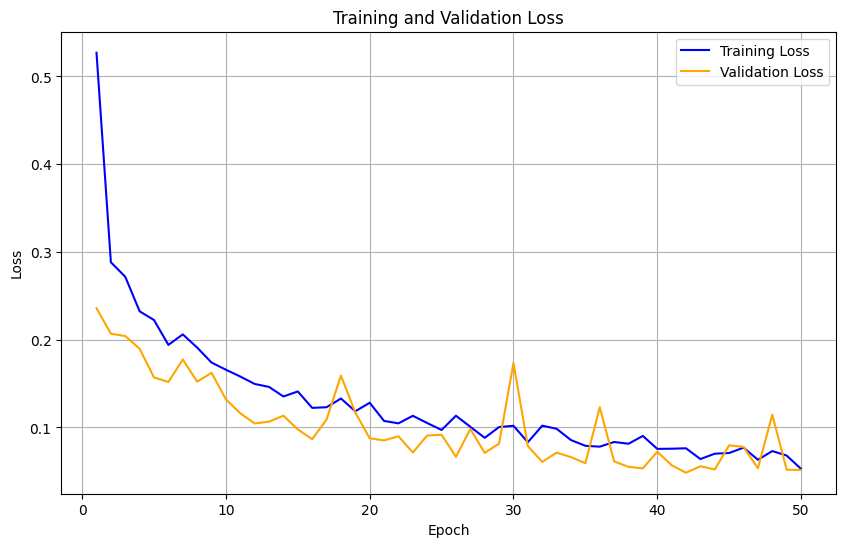

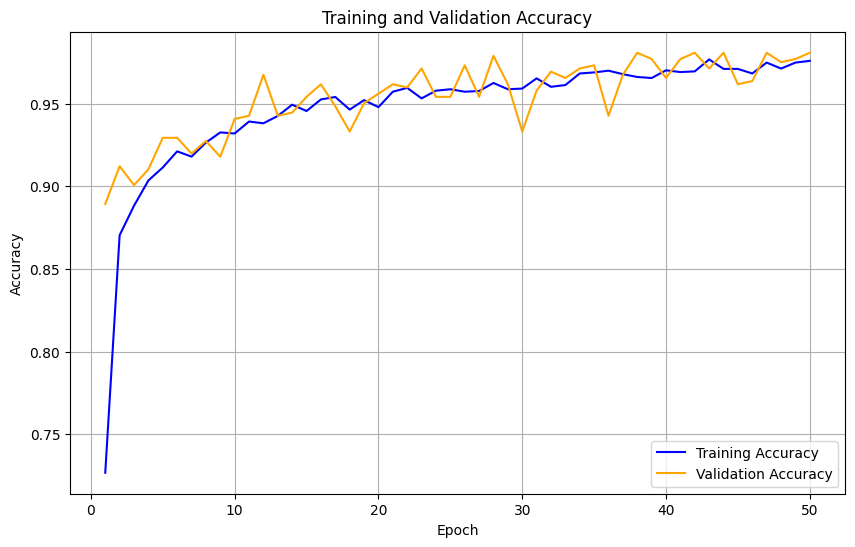

In [6]:
import torch
from torchvision.models.feature_extraction import create_feature_extractor
from torchvision import models
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.nn as nn
from torchvision import models

class ResNet(torch.nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.model = models.resnet50(weights='ResNet50_Weights.IMAGENET1K_V2')
        self.features = torch.nn.Sequential(*list(self.model.children())[:5])
        self.deconv = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(256, 64, kernel_size=4, stride=2, padding=1),
            torch.nn.ReLU(inplace=True),
            nn.Dropout2d(0.5),
            torch.nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
        )

    def forward(self, x):
        for name, param in self.features.named_parameters():
            param.requires_grad = False
        x = self.features(x)
        x = self.deconv(x)
        return x

class VGGNet(torch.nn.Module):
    def __init__(self):
        super(VGGNet, self).__init__()
        self.model = models.vgg16(weights='VGG16_Weights.IMAGENET1K_V1')
        self.features = torch.nn.Sequential(*list(self.model.features.children())[:17])
        self.deconv = torch.nn.Sequential(
            torch.nn.Upsample(scale_factor=2, mode='bilinear'),
            torch.nn.ReLU(inplace=True),
            torch.nn.ConvTranspose2d(256, 64, kernel_size=4, stride=2, padding=1),
            torch.nn.ReLU(inplace=True),
            nn.Dropout2d(0.5),
            torch.nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
        )

    def forward(self, x):
        for name, param in self.features.named_parameters():
            param.requires_grad = False
        x = self.features(x)
        x = self.deconv(x)
        return x    
    
class MobileNet(torch.nn.Module):
    def __init__(self):
        super(MobileNet, self).__init__()
        self.model = models.mobilenet_v3_large(weights='MobileNet_V3_Large_Weights.IMAGENET1K_V1')
        self.features = torch.nn.Sequential(*list(self.model.features.children())[:2])
        self.deconv = torch.nn.Sequential(
            nn.Dropout2d(0.5),
            torch.nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1),
        )

    def forward(self, x):
        for name, param in self.features.named_parameters():
            param.requires_grad = False
        x = self.features(x)
        x = self.deconv(x)
        return x    
    
class SwinTransformer(torch.nn.Module):
    def __init__(self):
        super(SwinTransformer, self).__init__()
        self.backbone = models.swin_t(weights='Swin_T_Weights.IMAGENET1K_V1')
        self.features = create_feature_extractor(self.backbone, return_nodes=['flatten'])

    def forward(self, x):
        for name, param in self.features.named_parameters():
            param.requires_grad = False
        return self.features(x)


class Head(torch.nn.Module):
    def __init__(self):
        super(Head, self).__init__()
        self.mlp_head = torch.nn.Sequential(
            torch.nn.Linear(768, 2),
        )

    def forward(self, x):
        return self.mlp_head(x)


class EWCAT(torch.nn.Module):
    def __init__(self):
        super(EWCAT, self).__init__()
        self.resnet = ResNet()
        self.vggnet = VGGNet()
        self.mobnet = MobileNet()
        self.swint = SwinTransformer()
        self.head = Head()

    def forward(self, x, features=False):
        f_res = self.resnet(x)
        f_vgg = self.vggnet(x)
        f_mob = self.mobnet(x)
        kR, kV, kD = 1/3, 1/3, 1/3 
        inte = kV * f_vgg + kR * f_res + kD * f_mob
        tran_out = self.swint(inte)
        if features:
            return tran_out['flatten']
        else:
            return self.head(tran_out['flatten'])


from sklearn.utils.class_weight import compute_class_weight
train_classes =  np.unique(train_dataset.labels)
train_labels = train_dataset.labels.ravel()
class_weights = compute_class_weight(class_weight='balanced', classes=train_classes, y=train_labels)

print(f"\n{class_weights}\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EWCAT().to(device)
pytorch_train_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
pytorch_all_params = sum(p.numel() for p in model.parameters())

print(pytorch_train_params, pytorch_all_params, "\n")

#TRAIN:

import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Set up the device (CUDA if available)


# Set Kaggle working directory for saving model, optimizer, and logs
kaggle_working_directory = "/kaggle/working/"

# Evaluation function
def evaluation(true_labels, pred_labels):
    true_labels = torch.cat(true_labels).cpu().numpy()
    pred_labels = torch.cat(pred_labels).cpu().numpy()

    tp = ((pred_labels == 1) & (true_labels == 1)).sum()
    tn = ((pred_labels == 0) & (true_labels == 0)).sum()
    fp = ((pred_labels == 1) & (true_labels == 0)).sum()
    fn = ((pred_labels == 0) & (true_labels == 1)).sum()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    f1_score = 2 * ppv * sensitivity / (ppv + sensitivity) if (ppv + sensitivity) > 0 else 0.0

    return accuracy, npv, ppv, sensitivity, specificity, f1_score

# Training parameters
learning_rate = 1e-3 #2e-3 #1e-3 #3e-3 #3e-3
min_lr = 1e-4
t_mult = 2
batch_size = train_batch_size
num_epochs = 50
weight_decay = 1e-3 #1e-3 #1e-2 #1e-2 #1e-2 #1e-4
alter_lr_patience = 5
lr_factor = 0.5
min_loss = 1e5 #1e-4 CHANGE FOR 1E-4 WHEN NOT USING SAVED MODEL!
useSavedModel = False
sepoch = 0
if not useSavedModel:
  min_loss = 1e5


# Initialize the optimizer, loss function, and learning rate scheduler
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
loss_func = torch.nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
if useSavedModel:
    opt_state_name = "best_optimizer_epoch_27.pth"
    opt_state = torch.load(os.path.join(kaggle_working_directory, opt_state_name), weights_only = True)
    optimizer.load_state_dict(opt_state)
    model_state_name = "best_model_epoch_27.pth"
    mod_state = torch.load(os.path.join(kaggle_working_directory, model_state_name), weights_only = True)
    model.load_state_dict(mod_state)
    sepoch = 27
    
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=lr_factor, patience=alter_lr_patience)

# Early stopping logic
class EarlyStopper:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss - self.min_delta:
            self.min_validation_loss = validation_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

# Instantiate the early stopper
# prev min_delta = 0.001
early_stopper = EarlyStopper(patience=10, min_delta=0.001)

# Lists to store losses and accuracies for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    t_loss_b, v_loss_b, train_in, val_in = 0, 0, 0, 0
    t_tle, t_ple, v_tle, v_ple = [], [], [], []
    print(f'\nEpoch {sepoch+epoch + 1}/{sepoch+num_epochs} \n' + '-' * 60)

    model.train()

    with tqdm(total=len(train_loader), desc=f"Training Epoch {sepoch + epoch + 1}/{sepoch+num_epochs}", unit="batch") as pbar:
        for step, (t_x, t_y) in enumerate(train_loader):
            t_x, t_y = t_x.to(device), t_y.to(device).squeeze(1)  # Handle (batch_size, 1) shape
            t_tle.append(t_y)
            output = model(t_x)

            loss = loss_func(output, t_y.long())  # Ensure t_y is of shape (batch_size,)
            lab = torch.argmax(output, dim=1)
            t_ple.append(lab)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            t_loss_b += loss.item() * t_x.size(0)
            train_in += t_x.size(0)

            # Update progress bar with loss and accuracy
            t_acc = (torch.cat(t_ple) == torch.cat(t_tle)).float().mean().item()
            pbar.set_postfix({"loss": f"{loss.item():.5f}", "acc": f"{t_acc:.5f}", "lr": scheduler.get_last_lr()})
            pbar.update(1)

    t_loss = t_loss_b / len(train_loader.dataset)
    t_acc, t_npv, t_ppv, t_sen, t_spe, t_f1 = evaluation(t_tle, t_ple)
    train_losses.append(t_loss)
    train_accuracies.append(t_acc)
    print(f"Train loss: {t_loss:.5f}, acc: {t_acc:.5f}, npv: {t_npv:.5f}, ppv: {t_ppv:.5f}, sen: {t_sen:.5f}, spe: {t_spe:.5f}, f1: {t_f1:.5f}")

    if val_loader is not None:
        model.eval()
        with torch.no_grad():
            with tqdm(total=len(val_loader), desc=f"Validation Epoch {sepoch + epoch + 1}/{sepoch + num_epochs}", unit="batch") as pbar:
                for step, (v_x, v_y) in enumerate(val_loader):
                    v_x, v_y = v_x.to(device), v_y.to(device).squeeze(1)
                    v_tle.append(v_y)
                    output = model(v_x)

                    loss = loss_func(output, v_y.long())
                    lab = torch.argmax(output, dim=1)
                    v_ple.append(lab)
                    v_loss_b += loss.item() * v_x.size(0)
                    val_in += v_x.size(0)

                    v_acc = (torch.cat(v_ple) == torch.cat(v_tle)).float().mean().item()
                    pbar.set_postfix({"loss": f"{loss.item():.5f}", "acc": f"{v_acc:.5f}"})
                    pbar.update(1)

        v_loss = v_loss_b / len(val_loader.dataset)
        v_acc, v_npv, v_ppv, v_sen, v_spe, v_f1 = evaluation(v_tle, v_ple)
        val_losses.append(v_loss)
        val_accuracies.append(v_acc)
        print(f"Val loss: {v_loss:.5f}, acc: {v_acc:.5f}, npv: {v_npv:.5f}, ppv: {v_ppv:.5f}, sen: {v_sen:.5f}, spe: {v_spe:.5f}, f1: {v_f1:.5f}")

        scheduler.step(v_loss)

        # Early stopping check
        if early_stopper.early_stop(v_loss):
            print(f"Early stopping at epoch {sepoch+epoch + 1}")
            # Save the model upon early stopping
            model_save_path = os.path.join(kaggle_working_directory, f"early_stop_model_epoch_{sepoch+epoch+1}.pth")
            optimizer_save_path = os.path.join(kaggle_working_directory, f"early_stop_optimizer_epoch_{sepoch+epoch+1}.pth")
            torch.save(model.state_dict(), model_save_path)
            torch.save(optimizer.state_dict(), optimizer_save_path)
            print(f"Model saved at {model_save_path}")
            break

        # Track the best epoch based on validation loss
        if v_loss < min_loss:
            min_loss = v_loss
            print(f"New best epoch {sepoch+epoch + 1}")
            # Save the model state and optimizer
            model_save_path = os.path.join(kaggle_working_directory, f"best_model_epoch_{sepoch+epoch+1}.pth")
            optimizer_save_path = os.path.join(kaggle_working_directory, f"best_optimizer_epoch_{sepoch+epoch+1}.pth")
#             if epoch > 15:
            torch.save(model.state_dict(), model_save_path)
            torch.save(optimizer.state_dict(), optimizer_save_path)

    else:
        print(f'Training only. Loss: {t_loss:.5f}, Accuracy: {t_acc:.5f}')


model_save_path = os.path.join(kaggle_working_directory, f"Final_model_epoch_{sepoch+num_epochs}.pth")
optimizer_save_path = os.path.join(kaggle_working_directory, f"Final_optimizer_epoch_{sepoch+num_epochs}.pth")
#             if epoch > 15:
torch.save(model.state_dict(), model_save_path)
torch.save(optimizer.state_dict(), optimizer_save_path)
# Plot and save training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(kaggle_working_directory, "loss_curve.png"))
plt.show()

# Plot and save training and validation accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(kaggle_working_directory, "accuracy_curve.png"))
plt.show()


## test

/tmp/ipykernel_36/3328354615.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_dict = torch.load(model_path, map_location=device)


Model testing started


Testing: 100%|██████████| 20/20 [00:04<00:00,  4.99batch/s]


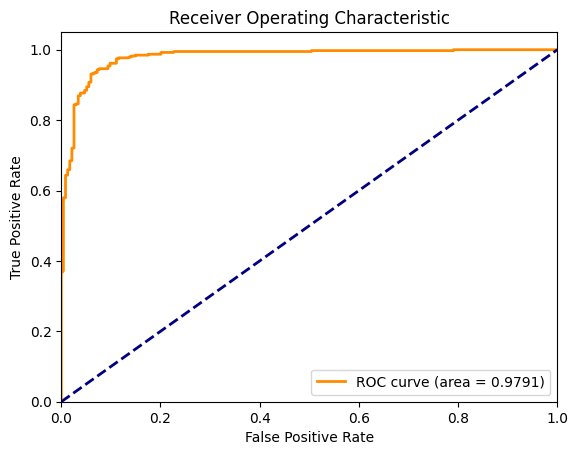

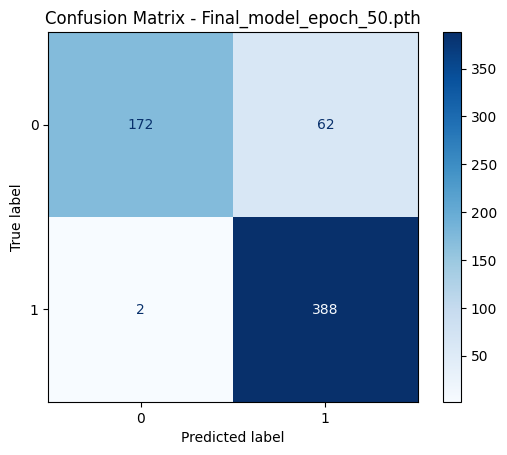

Test done in 0.0 m 4.029720067977905 s 
Test loss: 0.42315, acc: 0.89744, npv: 0.98851, ppv: 0.86222, sen: 0.99487, spe: 0.73504, fos: 0.92381, fpr: 0.26496


In [7]:
import time
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import os
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import functional as F

# Evaluation function to calculate accuracy, npv, ppv, etc.
def evaluation(true_labels, pred_labels):
    true_labels = torch.cat(true_labels).cpu().numpy()
    pred_labels = torch.cat(pred_labels).cpu().numpy()

    tp = ((pred_labels == 1) & (true_labels == 1)).sum()
    tn = ((pred_labels == 0) & (true_labels == 0)).sum()
    fp = ((pred_labels == 1) & (true_labels == 0)).sum()
    fn = ((pred_labels == 0) & (true_labels == 1)).sum()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0.0  # Precision
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0  # True negative rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0  # False positive rate
    f1_score = 2 * ppv * sensitivity / (ppv + sensitivity) if (ppv + sensitivity) > 0 else 0.0

    return accuracy, npv, ppv, sensitivity, specificity, f1_score, fpr

# Define the test function
def test(model_name, model_class, test_loader, log_directory, bp=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Set loss function (using CrossEntropyLoss)
    loss_func = torch.nn.CrossEntropyLoss()

    # Load the model and push to device
    model = model_class().to(device)
    model_path = os.path.join(log_directory, model_name)
    model_dict = torch.load(model_path, map_location=device)
    model.load_state_dict(model_dict)

    # Initialize tracking variables
    te_loss, te_loss_b, te_in = 0, 0, 0
    te_tle, te_ple = [], []
    all_probs = []

    print('Model testing started')
    since = time.time()
    model.eval()

    for step, (t_x, t_y) in enumerate(tqdm(test_loader, desc="Testing", unit="batch")):
        t_x, t_y = t_x.to(device), t_y.to(device).squeeze(1)
        te_tle.append(t_y)
        output = model(t_x)

        # Compute loss and probabilities
        loss = loss_func(output, t_y.long())
        probs = torch.softmax(output, dim=1)[:, 1]  # Probability of the positive class
        all_probs.append(probs.detach().cpu().numpy())  # Detach and convert to numpy

        # Determine the predicted labels
        lab = torch.argmax(output, dim=1)
        te_ple.append(lab)
        te_loss_b += loss.item() * t_x.size(0)
        te_in += t_x.size(0)

    # Final calculations
    t_c = time.time() - since
    te_loss = te_loss_b / len(test_loader.dataset)
    te_acc, te_npv, te_ppv, te_sen, te_spe, te_fos, te_fpr = evaluation(te_tle, te_ple)

    # Flatten the list of probabilities and true labels for ROC and confusion matrix
    all_probs = np.concatenate(all_probs)
    true_labels = torch.cat(te_tle).cpu().numpy()

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(true_labels, all_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve and save
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("/kaggle/working/roc_curve.png")
    plt.show()

    # Compute confusion matrix
    pred_labels = torch.cat(te_ple).cpu().numpy()
    cm = confusion_matrix(true_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig("/kaggle/working/confusion_matrix.png")
    plt.show()

    # Print summary metrics
    print(f'Test done in {t_c // 60} m {t_c % 60} s \nTest loss: {te_loss:.5f}, acc: {te_acc:.5f}, '
          f'npv: {te_npv:.5f}, ppv: {te_ppv:.5f}, sen: {te_sen:.5f}, spe: {te_spe:.5f}, fos: {te_fos:.5f}, fpr: {te_fpr:.5f}')

# Example usage:
log_directory = "/kaggle/working"
model_name = "early_stop_model_epoch_37.pth"  # Set your model name here
model_class = EWCAT  # Define your model class here
test_batch_size = 32

# Define your test DataLoader here
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False, num_workers=os.cpu_count())

# Run the test function
# test("best_model_epoch_27.pth", model_class, test_loader, log_directory, bp = False)
def ftest(model_name):
    test(model_name, model_class, test_loader, log_directory, bp = False)
ftest("Final_model_epoch_50.pth")

